# Homework 1 
## Problem 1
## Ruojun
### K-means algorithm to cluster dots into 2 or 3 clusters
### The result is shown on 

In [1]:
import numpy as np
from random import random
from scipy.spatial import distance
import  matplotlib.pyplot as plt
###############################################
#Auther: Ruojun
################################################
# Assign each point to nearest cluster by calculating
# its distance to each centroid.
# Find new cluster center by taking the average of
# the assigned points.
def cluster_Kmeans(data,cluster_num):
    cluster_centroids = []
    cluster_centroids_new = [[] for x in range(cluster_num)]
    for i in range(cluster_num):
        centroid_temp = np.array([random()*4, (random()-0.5)*2]).reshape(1, 2)
        cluster_centroids.append(centroid_temp)
    for i in range(cluster_num):
        centroid_temp = np.array([random(), random()]).reshape(1, 2)
        cluster_centroids.append(centroid_temp)

    iteration = 0
    while True:
        iteration+=1
        print("Iteration:",iteration, "th step")
        cluster_distance = []
        cluster_dict = [[] for x in range(cluster_num)]
        for i in range(cluster_num):
            centroid_temp = cluster_centroids[i]
            print("Cluster[",i,"]: ",centroid_temp)
            cluster_distance.append(distance.cdist(centroid_temp, data, 'euclidean').reshape(1, len(data)))

        for i in range(len(data)):
            distance_i = [cluster_distance[cluster_index][0,i] for cluster_index in range(cluster_num)]
            (m, index) = min((v, index) for index, v in enumerate(distance_i))
            cluster_dict[index].append(i)

        for i in range(cluster_num):
            cluster_temp = cluster_dict[i]
            data_temp = data[cluster_temp,0:2]
            cluster_centroids_new[i] = np.asarray([np.mean(data_temp[:,0]),np.mean(data_temp[:,1])]).reshape(1,2)
        if cluster_centroids_new == cluster_centroids:
            plot_cluster(cluster_dict,cluster_centroids_new)
            print("Final Centroids are: \n",cluster_centroids)
            break
        else:
            cluster_centroids = cluster_centroids_new
    return cluster_dict, cluster_centroids
#################################################
#Plot: shows the cluster with different colors:
def plot_cluster(cluster_dict,cluster_centroids):
    cluster_color = ['ro','g^','bs']
    fig, ax = plt.subplots()
    for i in range(cluster_num):
        cluster_temp = cluster_dict[i]
        data_temp = data[cluster_temp, 0:2]
        plt.plot(data_temp[:,0],data_temp[:,1],cluster_color[i])
        #plt.plot(cluster_centroids[i][0,0],cluster_centroids[i][0,1],cluster_color[i-1],markersize=20)
    ax.set(xlabel='Length (m)', ylabel='Width (m)',title=["Kmeans Cluster Result of",cluster_num,"clusters"])
    plt.legend(legend)

    
###########################
#  load file
file = open("cluster_data.txt", "r")
data = np.array([np.array([float(data_line.split()[1]),
                           float(data_line.split()[2])])
                 for data_line in file.readlines()])


Iteration: 1 th step
Cluster[ 0 ]:  [[0.37560791 0.813644  ]]
Cluster[ 1 ]:  [[ 1.0484516  -0.69381118]]
Cluster[ 2 ]:  [[3.20792012 0.38167091]]
Iteration: 2 th step
Cluster[ 0 ]:  [[0.78813668 0.41251519]]
Cluster[ 1 ]:  [[ 1.13690026 -0.24569923]]
Cluster[ 2 ]:  [[ 3.08408722e+00 -2.05580000e-03]]
Final Centroids are: 
 [array([[0.78285498, 0.36384363]]), array([[ 1.17894834, -0.27110084]]), array([[ 3.08657867e+00, -2.06095238e-03]])]


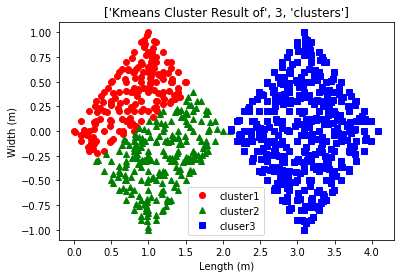

In [2]:
###############################################
#Intialize the parameters and cluster centroids
cluster_num = 3
legend = ['cluster1', 'cluster2', 'cluser3']
cluster_dict,cluster_centroids = cluster_Kmeans(data,cluster_num)


Iteration: 1 th step
Cluster[ 0 ]:  [[ 1.57892288 -0.89600684]]
Cluster[ 1 ]:  [[0.72772895 0.0904373 ]]
Iteration: 2 th step
Cluster[ 0 ]:  [[ 2.7554213  -0.08950521]]
Cluster[ 1 ]:  [[0.90215058 0.14681645]]
Final Centroids are: 
 [array([[ 3.06952346e+00, -2.46059753e-03]]), array([[0.99297703, 0.0049193 ]])]


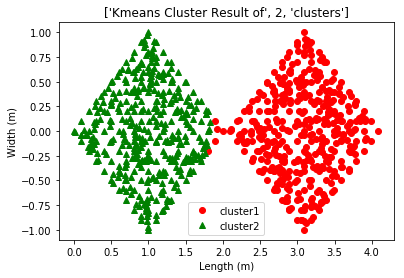

In [3]:
###############################################
#Intialize the parameters and cluster centroids
cluster_num = 2
legend = ['cluster1', 'cluster2']
cluster_dict,cluster_centroids = cluster_Kmeans(data,cluster_num)
